<a href="https://colab.research.google.com/github/rafaelbuzi/caged/blob/main/litoral_norte_CAGED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tratando os dados do CAGED**

O Cadastro Geral de Empregados e Desempregados (CAGED) foi criado como registro permanente de admissões e dispensa de empregados, sob o regime da Consolidação das Leis do Trabalho (CLT). É utilizado pelo Programa de Seguro-Desemprego, para conferir os dados referentes aos vínculos trabalhistas, além de outros programas sociais.

Os dados referente ao CAGED de Agosto podem ser baixados abaixo:

http://pdet.mte.gov.br/images/Novo_CAGED/Ago2022/3-tabelas.xlsx

## **0. Import das Bibliotecas e carregamento dos dados**

In [1]:
import pandas as pd
import numpy as np
df = pd.read_excel('3-tabelas.xlsx', "Tabela 8.1")

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Visão do DataFrame

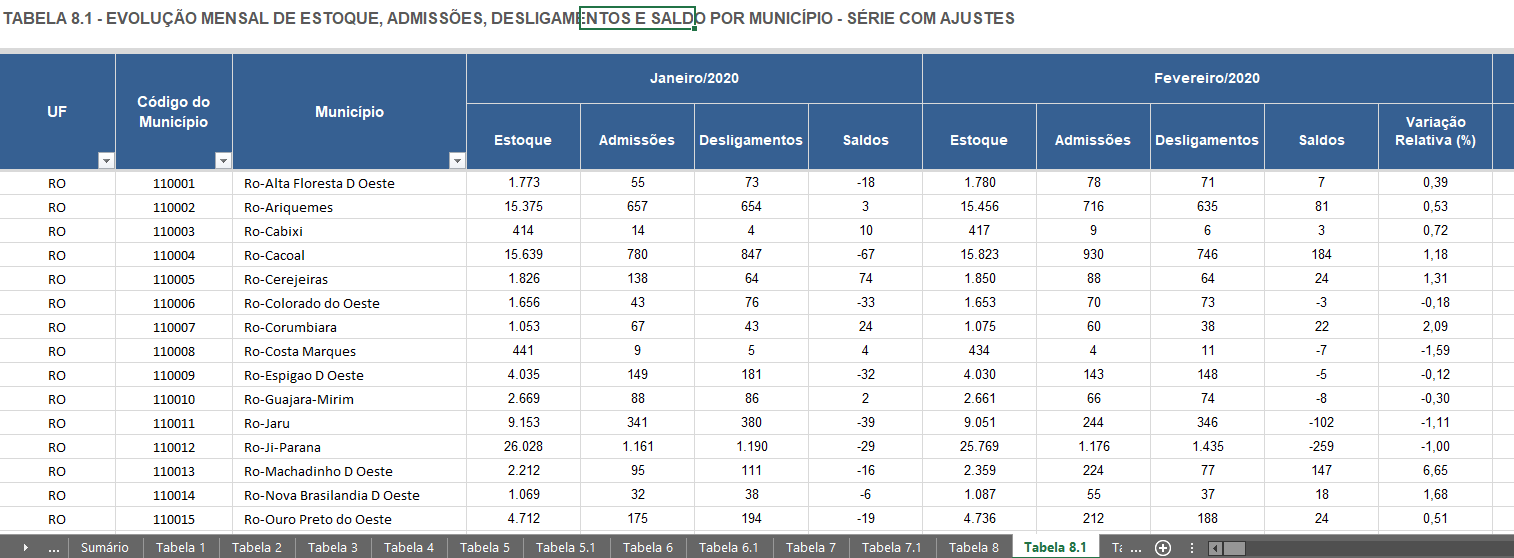

Abaixo, temos uma visão do dataframe. Esses dados são disponibilizados por uma planilha de *Excel* que contém inúmeras células mescladas.

São **5585 linhas** (todos os municípios do Brasil), e **166 colunas** que contém as admissões, demissões, estoques, saldo (*admissão menos demissão*) e variação relativa para cada mês de Janeiro/2020 até o mês de extração (neste caso, Agosto/2022).

In [3]:
df.shape

(5585, 166)

In [2]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165
0,NaN,"TABELA 8.1 - EVOLUÇÃO MENSAL DE ESTOQUE, ADMIS...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,\nUF,\nCódigo do Município,\nMunicípio,Janeiro/2020,NaN,NaN,NaN,Fevereiro/2020,NaN,...,NaN,NaN,Acumulado no Ano (2022),NaN,NaN,NaN,Últimos 12 Meses** (Ago/21 a Jul/22)**,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Estoque,Admissões,Desligamentos,Saldos,Estoque,Admissões,...,Saldos,Variação Relativa (%),Admissões,Desligamentos,Saldos,Variação Relativa (%),Admissões,Desligamentos,Saldos,Variação Relativa (%)


Em seguida, filtraremos apenas os 4 municípios do Litoral Norte.

Também criaremos condições especiais (`cond_5` e `cond_6`) para que possamos captar o cabeçalho e os meses.

In [4]:
cond_1 =df['Unnamed: 2']==355070 #São Sebastião
cond_2 =df['Unnamed: 2']==351050 #Caraguatatuba
cond_3 =df['Unnamed: 2']==352040 #Ilhabela
cond_4 =df['Unnamed: 2']==355540 #Ubatuba
cond_5 = df['Unnamed: 4']=='Janeiro/2020'
cond_6 = df['Unnamed: 4']=='Estoque'

In [5]:
df_ss = df[cond_1 | cond_2 | cond_3 | cond_4 | cond_5 | cond_6]

**Estado atual do Dataframe**

Ainda uma bagunça!

In [6]:
df_ss

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165
3,NaN,\nUF,\nCódigo do Município,\nMunicípio,Janeiro/2020,NaN,NaN,NaN,Fevereiro/2020,NaN,...,NaN,NaN,Acumulado no Ano (2022),NaN,NaN,NaN,Últimos 12 Meses** (Ago/21 a Jul/22)**,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Estoque,Admissões,Desligamentos,Saldos,Estoque,Admissões,...,Saldos,Variação Relativa (%),Admissões,Desligamentos,Saldos,Variação Relativa (%),Admissões,Desligamentos,Saldos,Variação Relativa (%)
3393,NaN,SP,351050,Sp-Caraguatatuba,21587,728,961,-233,21323,714,...,-30,-0.130316,7044,7224,-180,-0.776833,13261,11765,1496,6.959758
3505,NaN,SP,352040,Sp-Ilhabela,7008,260,303,-43,6926,271,...,6,0.078555,2239,2398,-159,-2.037678,4442,3887,555,7.829031
3839,NaN,SP,355070,Sp-Sao Sebastiao,15498,655,569,86,15675,686,...,102,0.554408,6571,5113,1458,8.555334,11704,8470,3234,21.184331
3894,NaN,SP,355540,Sp-Ubatuba,17874,752,783,-31,17625,595,...,-1,-0.005592,5328,5983,-655,-3.533474,10535,9831,704,4.098265


## **1. Ajustes**

Preenchendo os valores horizontalmente: *horizontal forward fill (axis = 1*)

Cabe ressaltar que ainda assim, haverá valores vazios.

In [7]:
df_ss = df_ss.ffill(axis=1)

**1.1 Criando o cabeçalho a partir da agregação entre primeira e segunda linha**

In [8]:
df_ss.columns = (df_ss.iloc[1] + '_' + df_ss.iloc[0])

**1.2 Removendo os valores vazios**

Observação: o parâmetro `how = all` garante a remoção apenas das colunas que possuam valores vazios **em todos os seus registros**.




In [9]:
df_ss = df_ss.dropna(axis=1, how='all')

**1.3 Em seguida, iremos utilizar os valores a partir da 2ª linha e 2ª coluna**

In [10]:
df_ss = df_ss.iloc[2:, 2:]

**1.4 Também renomearemos a primeira coluna a fim de se retirar o `NaN` como nome**

In [11]:
df_ss.rename(columns={df_ss.columns[0]: 'cidade'}, inplace=True)

**1.5 Unpivot de todas as colunas (transformar colunas em linhas) com exceção da coluna `cidade`.**

Os dados estão em formato de banco de dados colunar, ou seja, os registros estão armazenados nas colunas e não nas linhas. 

Os dados colunares não são ideais quando se é necessário visualizar múltiplos campos de cada linha. As bases de dados tradicionais de linhas tendem a ser melhores para *queries* que procuram apenas valores específicos do usuário. Adicionalmente, dados colunares tendem a demorar mais tempo para registrar novos dados (na maioria dos casos).

In [12]:
df_ss = pd.melt(df_ss, id_vars=['cidade'])

**1.6 Desmembramento das colunas que estavam agregadas e junção no *DataFrame*** 

In [13]:
new_cols = df_ss['variable'].str.split('_', expand=True)

df_ss = pd.concat([df_ss, new_cols], axis=1)

**1.7 Remoção da coluna `variable` e alteração dos nomes das colunas**

In [14]:
df_ss.drop(columns=['variable'], inplace=True)
df_ss.columns = ['cidade', 'qtde', 'tipo', 'data']

**1.8 Filtrando o *DataFrame* para remoção de valores não desejados**

In [15]:
df_ss = df_ss[df_ss["tipo"].str.contains("Vari") == False]
df_ss = df_ss[df_ss["data"].str.contains("Últimos") == False]
df_ss = df_ss[df_ss["data"].str.contains("Acumulado") == False]

**1.9 Criação das colunas `ano` e `mês`**

In [16]:
df_ss['ano'] = df_ss.data.str.extract('/(.*)')
df_ss['mês'] = df_ss['data'].str.split('/').str[0]

**1.10 Criação de colunas de datas baseadas nas colunas `ano` e `mês`.**

In [17]:
df_ss['data_completa'] = np.where(df_ss.mês=='Janeiro', '01/01/' + df_ss['ano'], 
                      np.where(df_ss.mês=='Fevereiro', '01/02/' + df_ss['ano'],
                      np.where(df_ss.mês=='Março', '01/03/' + df_ss['ano'],
                      np.where(df_ss.mês=='Abril', '01/04/' + df_ss['ano'],
                      np.where(df_ss.mês=='Maio', '01/05/' + df_ss['ano'],
                      np.where(df_ss.mês=='Junho', '01/06/' + df_ss['ano'],
                      np.where(df_ss.mês=='Julho', '01/07/' + df_ss['ano'],
                      np.where(df_ss.mês=='Agosto', '01/08/' + df_ss['ano'],
                      np.where(df_ss.mês=='Setembro', '01/09/' + df_ss['ano'],
                      np.where(df_ss.mês=='Outubro', '01/10/' + df_ss['ano'],
                      np.where(df_ss.mês=='Novembro', '01/11/' + df_ss['ano'],
                     np.where(df_ss.mês=='Dezembro', '01/12/' + df_ss['ano'],'a'))))))))))))

                     

**1.11 Remoção do prefixo "Sp" na coluna `cidade`**

In [18]:
df_ss['cidade'] = df_ss['cidade'].str.replace('Sp-', '', regex=True)

**1.12 Remoção de colunas não utilizadas**

In [19]:
df_ss = df_ss.drop(columns=['data', 'ano', 'mês'])

**1.13 Ajuste da coluna `tipo`**

In [20]:
df_ss['tipo'] = np.where(df_ss["tipo"].str.contains("referência") == True, 'Estoque', df_ss['tipo'])

**1.14 Criação da Pivot Table**

In [21]:
df_final = pd.pivot_table(df_ss, values='qtde', index=['cidade','data_completa'], columns=['tipo']).reset_index()

**1.15 Criação de *linhas* contendo o nome de cidade Litoral Norte**

Para realizar tal operação, nós iremos somar as admissões, desligamentos, estoques e saldo das cidades de Caraguatatuba, Ilhabela e Ubatuba.

Iremos realizar um agrupamento inicial, e, a partir deste, juntaremos esse novo *DataFrame* que será criado (df_litoral_norte) com o nosso *DataFrame* anterior, do *passo 1.15*.

In [22]:
cond_a = df_final.cidade=='Caraguatatuba'
cond_b = df_final.cidade=='Ilhabela'
cond_c = df_final.cidade=='Ubatuba'

df_litoral_norte = df_final[cond_a | cond_b | cond_c].groupby(['cidade', 'data_completa'])[['Admissões', 'Desligamentos', 'Estoque', 'Saldos' ]].sum()
df_litoral_norte.reset_index(inplace=True)
df_litoral_norte['cidade'] = 'Litoral Norte'
df_litoral_norte.head(3)

tipo,cidade,data_completa,Admissões,Desligamentos,Estoque,Saldos
0,Litoral Norte,01/01/2020,728.0,961.0,21587.0,-233.0
1,Litoral Norte,01/01/2021,782.0,1091.0,21272.0,-309.0
2,Litoral Norte,01/01/2022,954.0,1132.0,22993.0,-178.0


## **2. Criação do DataFrame final com o ajuste**

In [23]:
df_ajustado = pd.concat([df_final, df_litoral_norte], axis=0)
df_ajustado.to_excel('df_ajustado.xlsx')

In [24]:
df_ajustado

tipo,cidade,data_completa,Admissões,Desligamentos,Estoque,Saldos
0,Caraguatatuba,01/01/2020,728.0,961.0,21587.0,-233.0
1,Caraguatatuba,01/01/2021,782.0,1091.0,21272.0,-309.0
2,Caraguatatuba,01/01/2022,954.0,1132.0,22993.0,-178.0
3,Caraguatatuba,01/02/2020,714.0,978.0,21323.0,-264.0
4,Caraguatatuba,01/02/2021,825.0,932.0,21165.0,-107.0
...,...,...,...,...,...,...
88,Litoral Norte,01/10/2021,1068.0,657.0,17631.0,411.0
89,Litoral Norte,01/11/2020,1145.0,547.0,17106.0,598.0
90,Litoral Norte,01/11/2021,1144.0,699.0,18076.0,445.0
91,Litoral Norte,01/12/2020,1346.0,763.0,17689.0,583.0
